In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np    

from sklearn.decomposition import PCA
from numpy import linalg as LA

In [2]:
from gensim.test.utils import datapath

In [3]:
import gensim.downloader as api
wv = api.load('glove-wiki-gigaword-300')

[===-----------------------------------------------] 6.9% 26.0/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 17.6% 66.1/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 45.3% 170.3/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.8% 375.4/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
len(wv.vocab)

400000

In [44]:
'basilicum' in wv.vocab

False

In [49]:
'maastricht' in wv.vocab

True

In [7]:
wv["utrecht"]

array([ 1.7246e-01, -9.2534e-02,  1.6428e-01,  5.6065e-01,  2.8004e-01,
       -1.5202e-02,  2.7825e-01, -6.5038e-01,  6.6932e-03,  1.0561e-01,
        7.0731e-01,  3.0788e-02,  1.6741e-02, -5.1297e-02,  3.9779e-02,
        5.6926e-01, -2.2903e-01,  3.7331e-01,  3.4440e-01,  2.1143e-01,
        1.9787e-01, -2.5727e-01,  2.0160e-01, -2.5648e-02, -4.7996e-01,
       -1.4263e-02, -5.5923e-01,  1.0823e-01, -9.0213e-01,  1.9254e-01,
        4.6962e-01, -4.2952e-01,  8.1015e-01,  1.1222e+00,  2.8237e-01,
       -6.0666e-01,  2.8948e-01,  3.1003e-01, -4.3745e-01, -1.0235e-01,
        3.1119e-01, -3.2637e-02, -5.5157e-01, -5.0208e-01,  4.2994e-01,
        3.2319e-01,  4.6997e-01,  7.5685e-02, -3.1806e-02,  3.5623e-01,
        5.9764e-02,  2.4482e-01,  1.0263e-03,  4.6040e-01,  1.5376e-01,
       -2.7841e-01,  2.6469e-02, -1.0785e-01, -4.5553e-01,  2.3964e-01,
       -4.4707e-01,  1.1521e-01,  2.1919e-01,  4.9167e-01,  3.4367e-01,
       -1.2389e-01,  3.1069e-01,  3.7095e-01,  3.8991e-04, -4.66

In [8]:
wv["utrecht"].shape

(300,)

In [9]:
wv.similarity('university', 'student')

0.5970513

In [10]:
wv_university_norm = wv['university']/ LA.norm(wv['university'], 2)
wv_student_norm = wv['student'] / LA.norm(wv['student'], 2)

wv_university_norm.dot(wv_student_norm)

0.5970513

In [11]:
LA.norm(wv_student_norm)

1.0

In [ ]:
#Similarity analysis

In [50]:
#Print the top 5 most similar words to car

print(wv.most_similar(positive=['cat'], topn=5))

[('dog', 0.6816747188568115), ('cats', 0.6815836429595947), ('pet', 0.5870364904403687), ('dogs', 0.540766716003418), ('feline', 0.48979705572128296)]


In [13]:
wv.similarity('buy', 'purchase')

0.77922326

In [26]:
wv.evaluate_word_pairs(datapath('wordsim353.tsv'))

((0.6040760957004208, 1.7523024672926684e-36),
 SpearmanrResult(correlation=0.6085349998820805, pvalue=3.879629536780527e-37),
 0.0)

In [14]:
def display_scatterplot(wv, words=None, sample=0):
        
    # first get the word vectors
    word_vectors = np.array([wv[w] for w in words])

    # transform the data using PCA
    wv_PCA = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10,10))

    plt.scatter(wv_PCA[:,0], wv_PCA[:,1], 
                edgecolors='k', c='r')
    
    for word, (x,y) in zip(words, wv_PCA):
        plt.text(x+0.05, y+0.05, word)

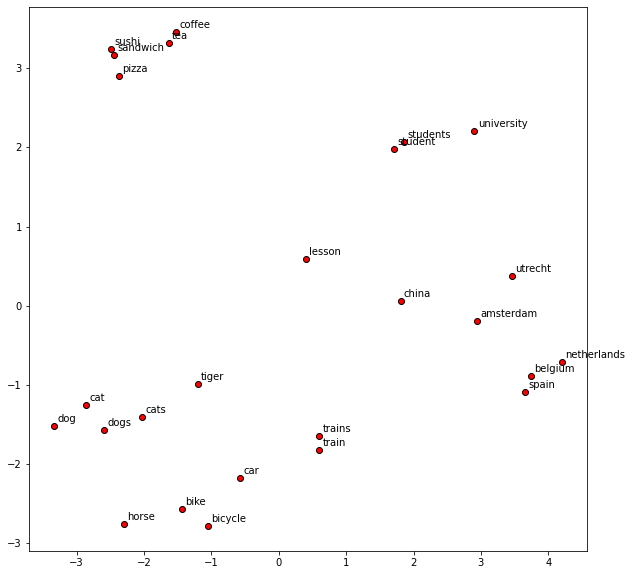

In [17]:
display_scatterplot(wv, 
                        ['dog', 'cat', 'dogs', 'cats', 'horse', 'tiger',
                         'university', 'lesson', 'student', 'students',
                         'netherlands', 'amsterdam', 'utrecht', 'belgium', 'spain', 'china',
                         'coffee', 'tea', 'pizza', 'sushi', 'sandwich',
                         'car', 'train', 'bike', 'bicycle', 'trains'])

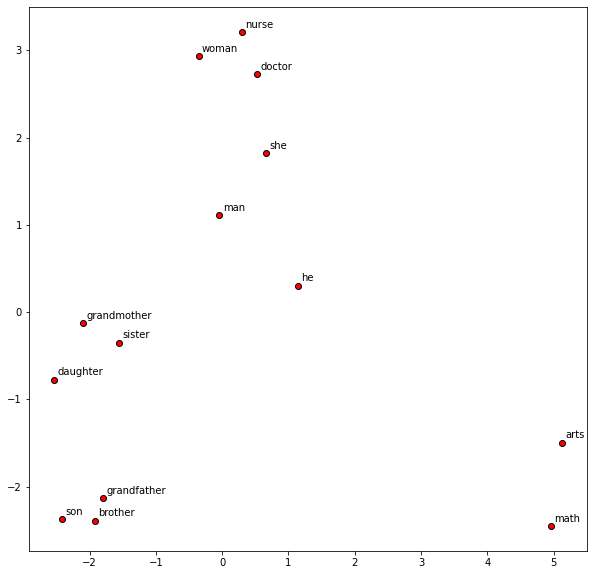

In [18]:
display_scatterplot(wv, 
                        ['he', 'she', 'sister', 
                         'brother', 'man', 'woman',
                         'nurse', 'doctor', 
                         'grandfather', 'grandmother',
                         'math', 'arts',
                         'daughter', 'son'])

In [19]:
def calc_avg_similiarity(wv, attribute_words, target_word):
    score = 0

    for attribute_word in attribute_words:
            score += wv.similarity(attribute_word, target_word)

    return score/len(attribute_words)

In [20]:
# set of attribute words
attribute_words_m = ['male', 'man', 'boy', 'brother', 'he', 'him', 'his', 'son']
attribute_words_f = ['female', 'woman', 'girl', 'sister', 'she', 
                     'her', 'hers', 'daughter']

In [21]:
#Is math more associated with male or female words?
#Compute the average cosine similarity between the target word and the set of attribute words.

print("Avg. similarity with male words: %.3f" % 
      calc_avg_similiarity(wv, attribute_words_m, 'math'))
print("Avg. similarity with female words: %.3f" % 
      calc_avg_similiarity(wv, attribute_words_f, 'math'))

Avg. similarity with male words: 0.118
Avg. similarity with female words: 0.105


In [22]:
#What about poetry?

print("Avg. similarity with male words: %.3f" % 
      calc_avg_similiarity(wv, attribute_words_m, 'poetry'))
print("Avg. similarity with female words: %.3f" % 
      calc_avg_similiarity(wv, attribute_words_f, 'poetry'))

Avg. similarity with male words: 0.166
Avg. similarity with female words: 0.185


In [ ]:
####################

In [23]:
import gensim.downloader as api
twitter = api.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [24]:
len(twitter.vocab)

1193514

In [27]:
twitter.evaluate_word_pairs(datapath('wordsim353.tsv'))

((0.4691938203172007, 2.7469863888689287e-20),
 SpearmanrResult(correlation=0.460432602938833, pvalue=1.6621434759294624e-19),
 2.26628895184136)

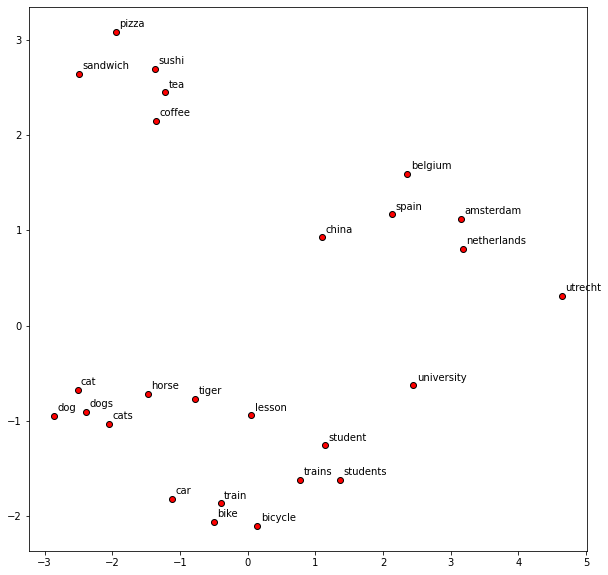

In [25]:
display_scatterplot(twitter, 
                        ['dog', 'cat', 'dogs', 'cats', 'horse', 'tiger',
                         'university', 'lesson', 'student', 'students',
                         'netherlands', 'amsterdam', 'utrecht', 'belgium', 'spain', 'china',
                         'coffee', 'tea', 'pizza', 'sushi', 'sandwich',
                         'car', 'train', 'bike', 'bicycle', 'trains'])

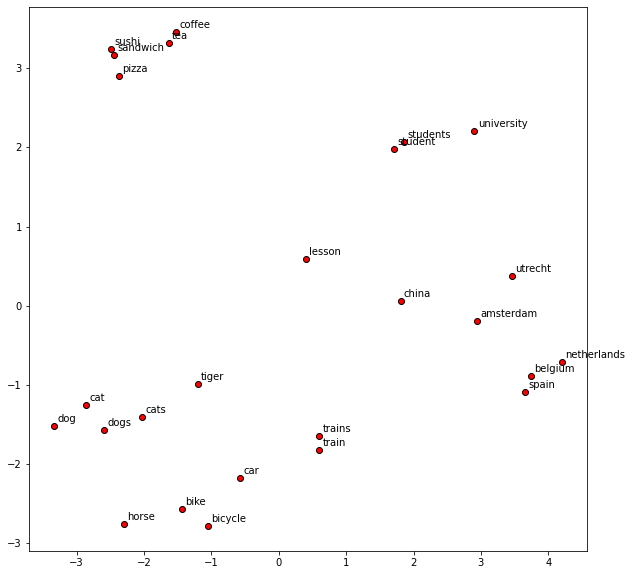

In [40]:
display_scatterplot(wv, 
                        ['dog', 'cat', 'dogs', 'cats', 'horse', 'tiger',
                         'university', 'lesson', 'student', 'students',
                         'netherlands', 'amsterdam', 'utrecht', 'belgium', 'spain', 'china',
                         'coffee', 'tea', 'pizza', 'sushi', 'sandwich',
                         'car', 'train', 'bike', 'bicycle', 'trains'])

In [37]:
print("Wikipedia:", wv.evaluate_word_pairs(datapath('wordsim353.tsv')))
print(" ")
print("Twitter:",twitter.evaluate_word_pairs(datapath('wordsim353.tsv')))

Wikipedia: ((0.6040760957004208, 1.7523024672926684e-36), SpearmanrResult(correlation=0.6085349998820805, pvalue=3.879629536780527e-37), 0.0)
 
Twitter: ((0.4691938203172007, 2.7469863888689287e-20), SpearmanrResult(correlation=0.460432602938833, pvalue=1.6621434759294624e-19), 2.26628895184136)


In [39]:
print("Wikipedia voc size:", len(wv.vocab))
print("Twitter voc size:", len(twitter.vocab))

Wikipedia voc size: 400000
Twitter voc size: 1193514


In [28]:
wv.most_similar(negative=['man'], positive=['king', 'woman'])

[('queen', 0.6713277101516724),
 ('princess', 0.5432624816894531),
 ('throne', 0.5386105179786682),
 ('monarch', 0.5347574949264526),
 ('daughter', 0.498025119304657),
 ('mother', 0.4956442713737488),
 ('elizabeth', 0.4832652509212494),
 ('kingdom', 0.47747087478637695),
 ('prince', 0.4668240249156952),
 ('wife', 0.46473273634910583)]

In [29]:
twitter.most_similar(negative=['man'], positive=['king', 'woman'])

[('prince', 0.759779691696167),
 ('stone', 0.7595877051353455),
 ('queen', 0.7546269297599792),
 ('meets', 0.7404001951217651),
 ('royal', 0.7376409769058228),
 ('african', 0.7345032095909119),
 ('american', 0.7139526605606079),
 ('virgin', 0.7101486921310425),
 ('mother', 0.7023203372955322),
 ('called', 0.6990437507629395)]

In [30]:
 wv.most_similar(negative=['paris'], positive=['france', 'amsterdam'])

[('netherlands', 0.7304362058639526),
 ('dutch', 0.5829049944877625),
 ('belgium', 0.5607962012290955),
 ('holland', 0.5492808222770691),
 ('denmark', 0.5330450534820557),
 ('sweden', 0.4875030517578125),
 ('germany', 0.4710354804992676),
 ('utrecht', 0.46798405051231384),
 ('spain', 0.46100151538848877),
 ('rotterdam', 0.45599010586738586)]

In [31]:
 twitter.most_similar(negative=['paris'], positive=['france', 'amsterdam'])

[('netherlands', 0.7781315445899963),
 ('rotterdam', 0.7495630979537964),
 ('utrecht', 0.7445160150527954),
 ('belgium', 0.7402228116989136),
 ('nederland', 0.7380615472793579),
 ('groningen', 0.73456871509552),
 ('haag', 0.730109453201294),
 ('italie', 0.7207984924316406),
 ('eindhoven', 0.7195240259170532),
 ('switzerland', 0.7183636426925659)]

In [32]:
print(wv.most_similar(positive=['girl'], topn=5))

[('boy', 0.8272891044616699), ('woman', 0.7296419143676758), ('girls', 0.7227291464805603), ('teenager', 0.650977373123169), ('teenage', 0.6492719054222107)]


In [33]:
print(twitter.most_similar(positive=['girl'], topn=5))

[('boy', 0.9283967614173889), ('she', 0.9010761976242065), ('girls', 0.8980120420455933), ('friend', 0.8944913148880005), ('guy', 0.8938031792640686)]
